In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
data_header = './fitbit_sleep_header_20190128.csv'
data_granular = './fitbit_sleep_levels_20190128.csv'

In [3]:
header = pd.read_csv(data_header)
sleep = pd.read_csv(data_granular)

In [4]:
sleep.head()

,dateTime,level,logID,seconds
0,2018-09-08T23:53:30.000,asleep,19454971019,180
1,2018-09-08T23:56:30.000,restless,19454971019,60
2,2018-09-08T23:57:30.000,asleep,19454971019,960
3,2018-09-09T00:13:30.000,restless,19454971019,60
4,2018-09-09T00:14:30.000,asleep,19454971019,180


In [5]:
sleep.dtypes

dateTime    object
level       object
logID        int64
seconds      int64
dtype: object

In [6]:
DTM = []
for i in sleep['dateTime']:
    a = datetime.datetime.strptime(i, "%Y-%m-%dT%H:%M:%S.%f")
    DTM.append(a)
    
# sleep['DTM'] = DTM

In [7]:
sleep.set_index('dateTime',inplace = True)

In [8]:
sleep.head()

,level,logID,seconds
dateTime,,,
2018-09-08T23:53:30.000,asleep,19454971019,180
2018-09-08T23:56:30.000,restless,19454971019,60
2018-09-08T23:57:30.000,asleep,19454971019,960
2018-09-09T00:13:30.000,restless,19454971019,60
2018-09-09T00:14:30.000,asleep,19454971019,180


In [9]:
sleep.groupby(by=['logID','level']).sum()

seconds
logID       level            
19445045219 asleep      24960
            awake         120
            restless      780
19454971019 asleep      22800
            restless     1680
19774997794 asleep      20820
            awake         120
            restless      840
19774997795 asleep      20220
            awake         240
            restless     1260
19807801480 asleep      30480
            restless     1440
19828050976 asleep      17040
            restless     1440
19843182588 asleep      24900
            awake         120
            restless      960
19849371031 asleep      25680
            awake         180
            restless      420
19884157131 asleep      23940
            awake         300
            restless      300
19902263062 asleep      26280
            restless     1200
19902263063 asleep      25200
            restless     1260
19944450228 asleep      19560
            restless      480
...                       ...
20834732307 asleep      24300
            restless      660
20834732308 asleep      21480
            restless     1260
20840551411 asleep      27420
            awake         300
            restless     2880
20866123530 asleep      22920
            awake         180
            restless     1620
20907691034 asleep      29280
            awake         240
            restless      660
20907691035 asleep      22260
            awake         240
            restless     1680
20907691036 asleep      29640
            awake         120
            restless     1620
20991601501 asleep       5340
20991601502 asleep      25020
            restless      600
20991601503 asleep      27900
            awake         180
            restless     2040
20991601504 asleep      21780
            restless      300
20991601505 asleep      40620
            awake         120
            restless     1020

[202 rows x 1 columns]

In [18]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (35,) and (18,)

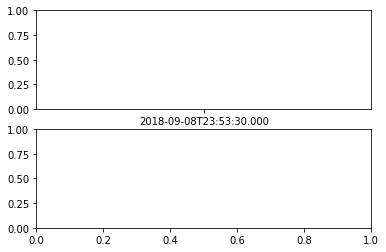

In [39]:
x = sleep[(sleep['logID']==19454971019)].index
y1 = sleep[(sleep['level']=='asleep') & (sleep['logID']==19454971019)]['seconds']/60.0
y2 = sleep[(sleep['level']=='restless') & (sleep['logID']==19454971019)]['seconds']/60.0
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2)
axarr[0].plot(x, y1)
axarr[0].set_title('Sharing X axis')
axarr[1].plot(x, y2)

TypeError: 'tuple' object does not support item assignment

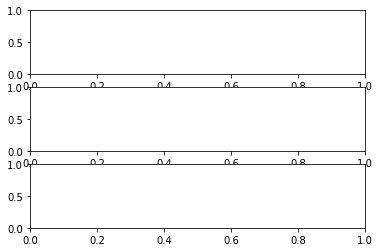

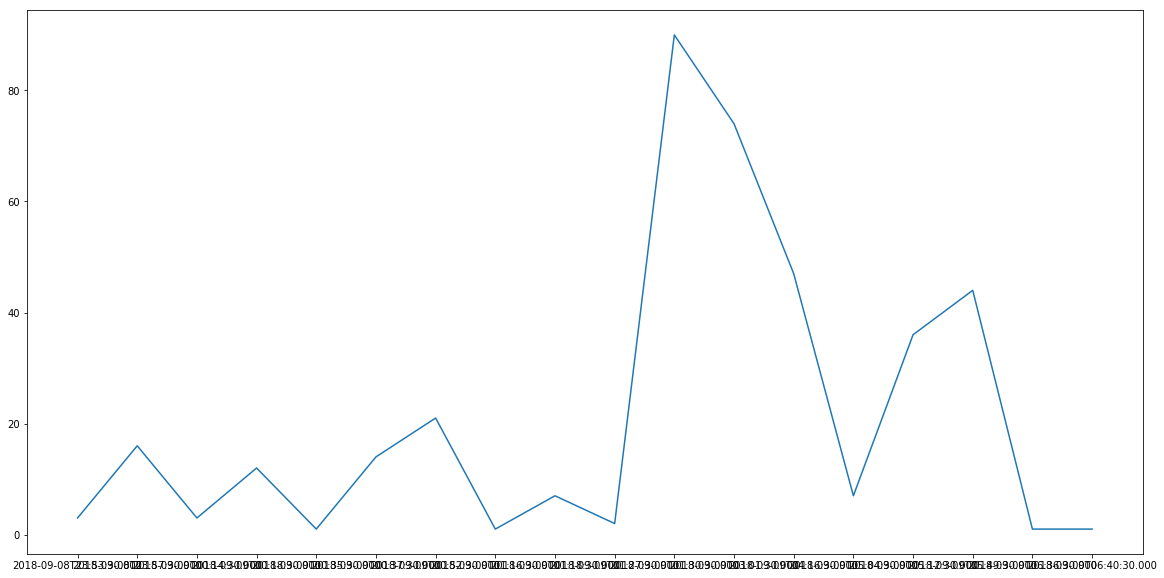

In [37]:
ax = plt.subplots(nrows = 3, ncols=1)
plt.figure(figsize=(20,10))
y = sleep[(sleep['level']=='asleep') & (sleep['logID']==19454971019)]['seconds']/60.0
ax[0,0] = plt.plot(sleep[(sleep['level']=='asleep') & (sleep['logID']==19454971019)].index, y)

# plt.plot(sleep[(sleep['level']=='restless') & (sleep['logID']==19454971019)].index,
#          sleep[(sleep['level']=='restless') & (sleep['logID']==19454971019)]['seconds']/60.0)
plt.gcf().autofmt_xdate()

TypeError: unhashable type: 'numpy.ndarray'

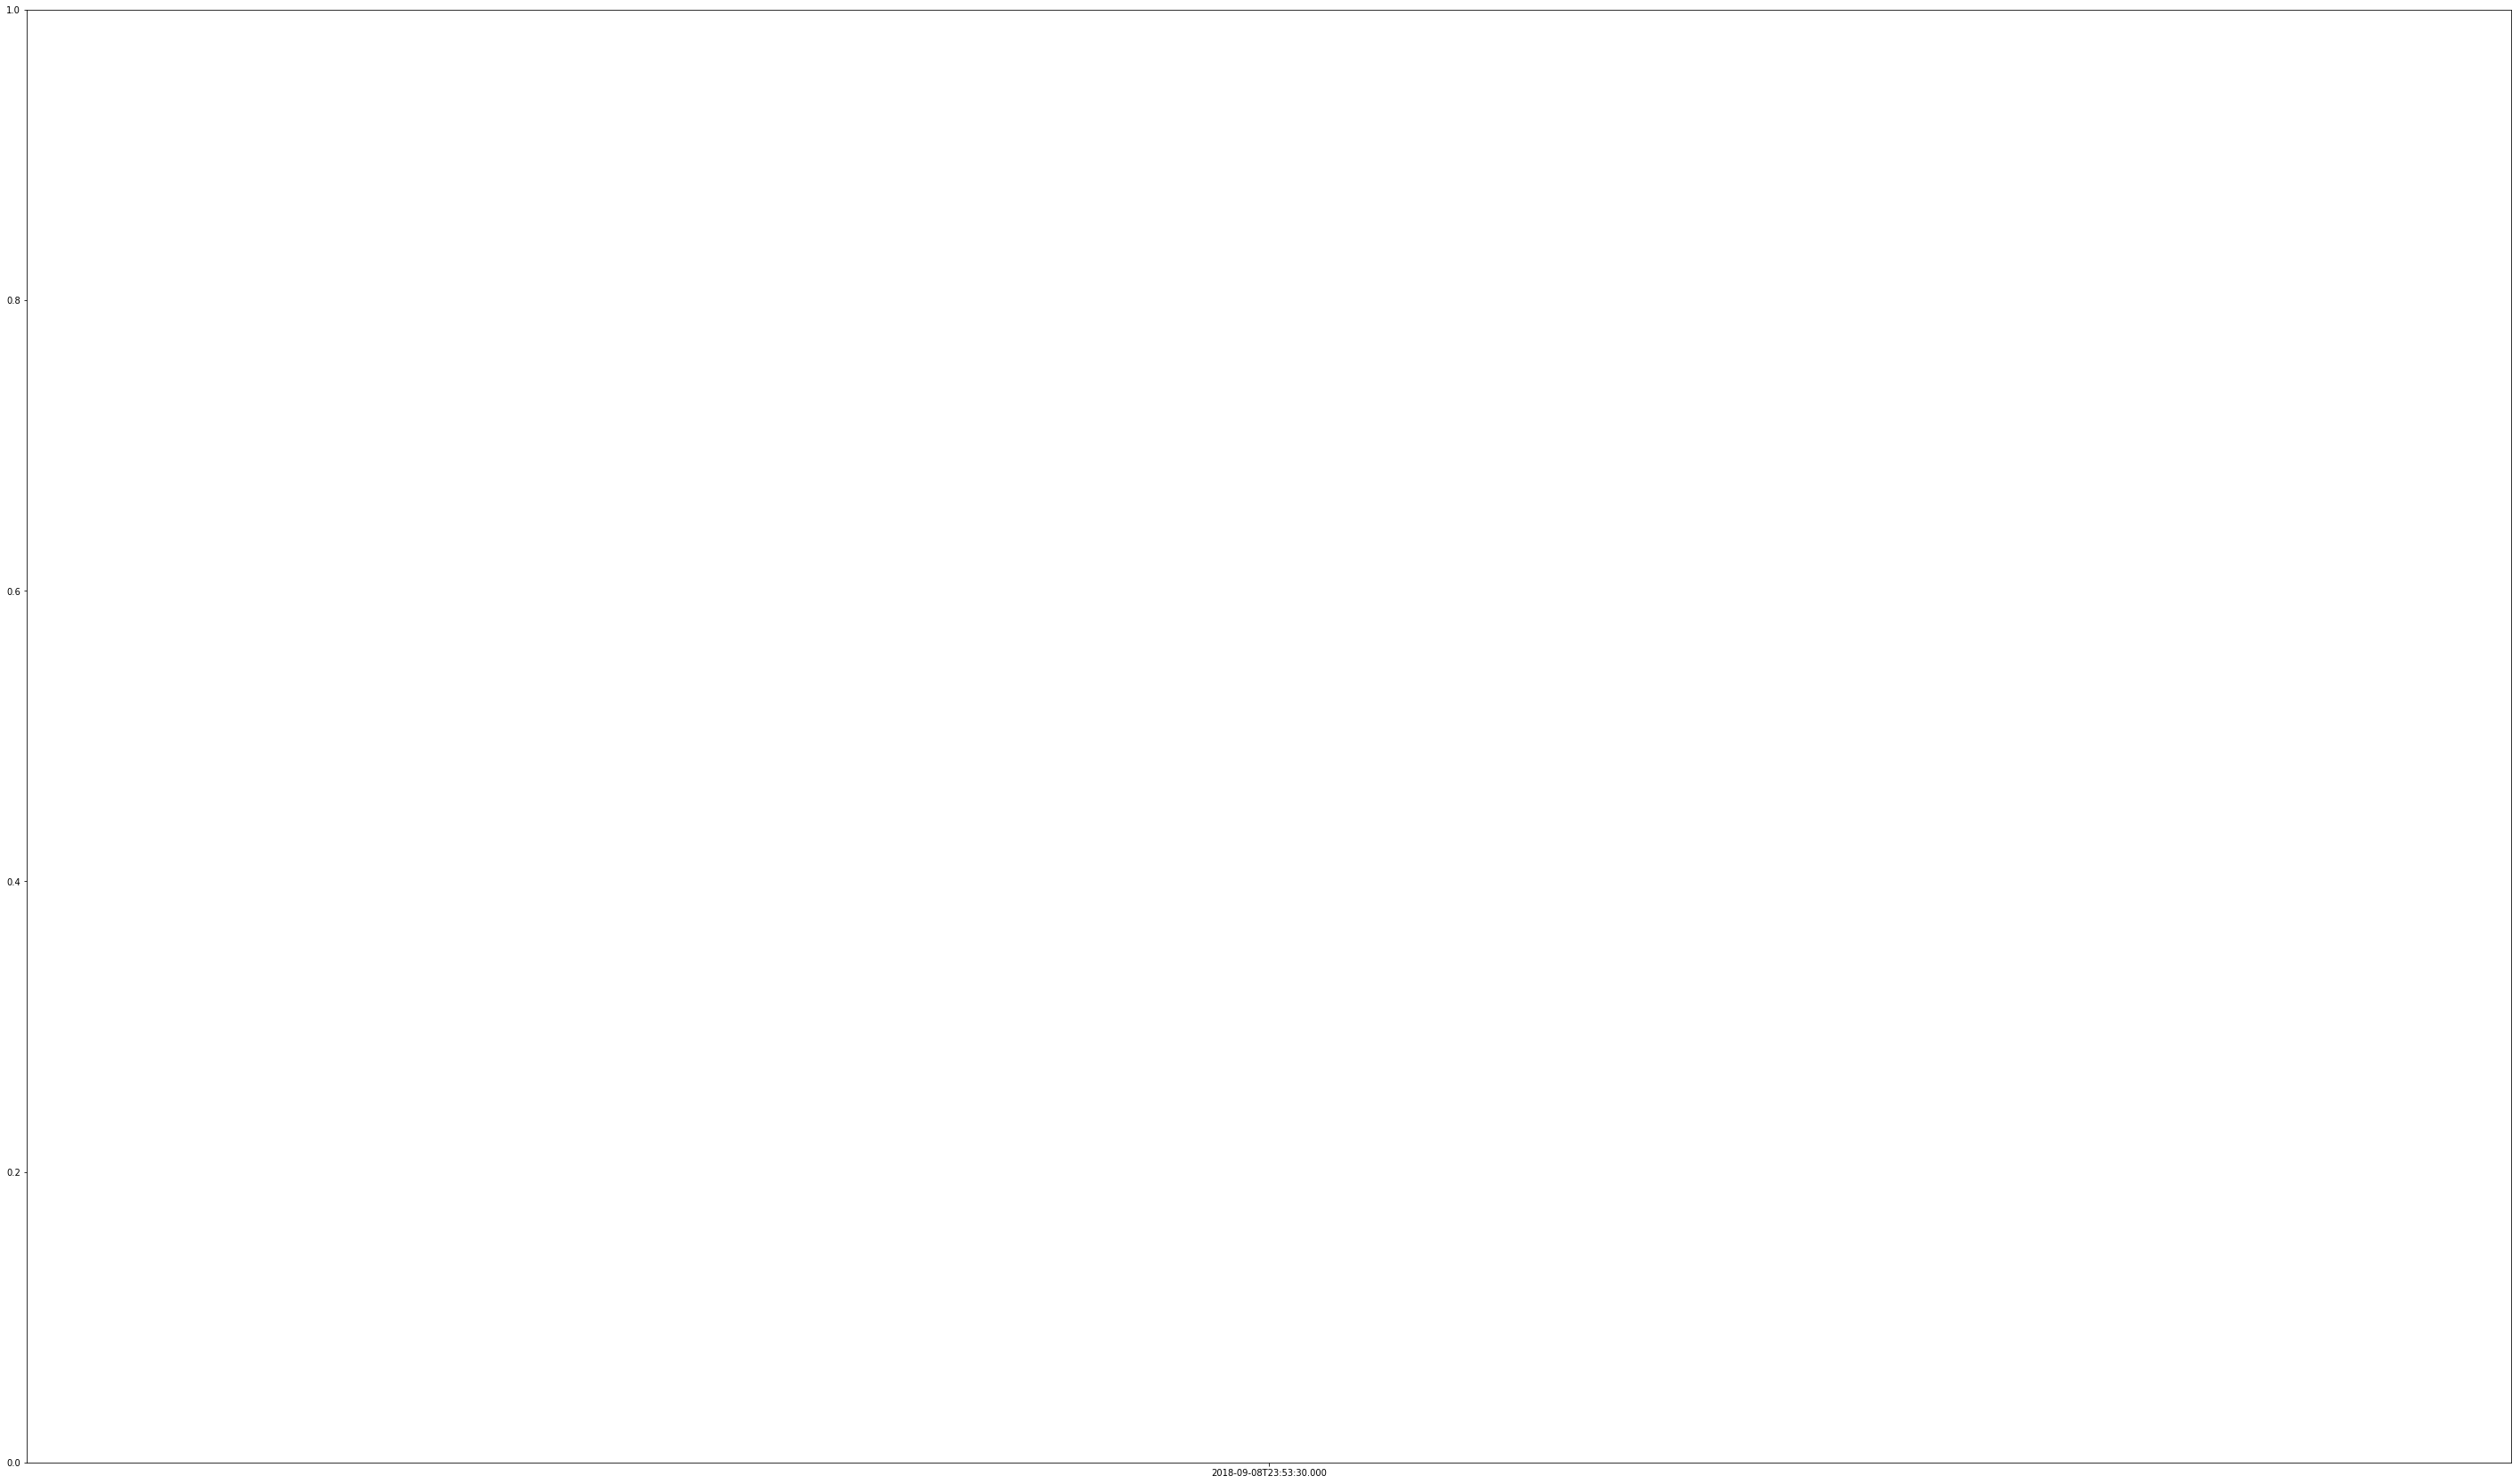

In [20]:
plt.figure(figsize=(50,30))
plt.plot(sleep.index,sleep[sleep['level']=='asleep']);

In [42]:
# plt.plot(sleep.groupby(by=['logID','level']).sum()['asleep'], kind='bar')

KeyError: 'asleep'